In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Loading the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Display the first few rows of the dataset
print("Iris dataset loaded. First 5 rows of the dataset:")
print(iris_df.head())

# Since this is a clustering task, we drop the 'species' target column
print("\nSpecies column dropped as it is not needed for clustering.")

Iris dataset loaded. First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Species column dropped as it is not needed for clustering.


E:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na',

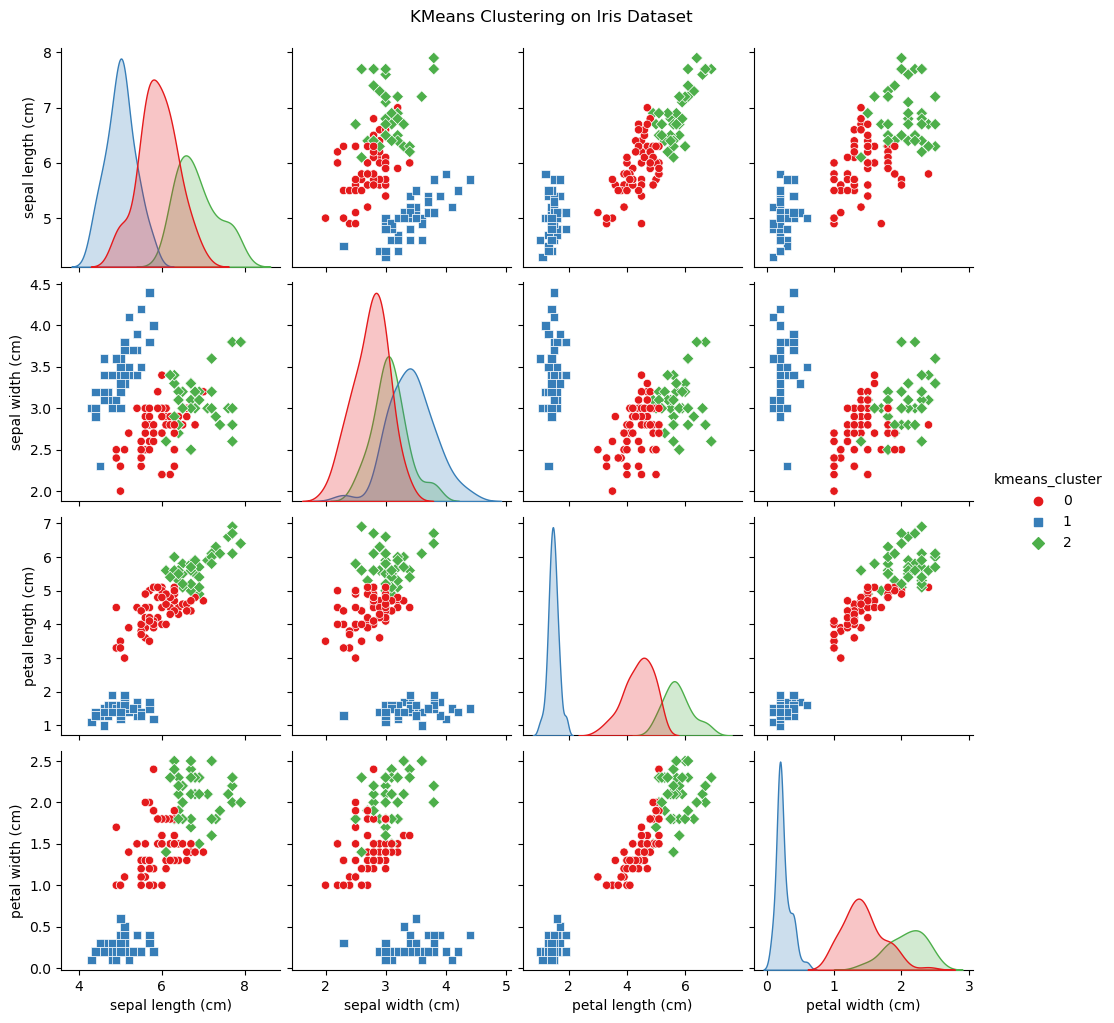

KMeans cluster centers:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [2]:
# Importing KMeans
from sklearn.cluster import KMeans

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
iris_df['kmeans_cluster'] = kmeans.fit_predict(iris_df)

# Visualizing KMeans clusters using a pair plot
sns.pairplot(iris_df, hue='kmeans_cluster', palette='Set1', markers=["o", "s", "D"])
plt.suptitle("KMeans Clustering on Iris Dataset", y=1.02)
plt.show()

# Displaying the cluster centers
print("KMeans cluster centers:")
print(kmeans.cluster_centers_)

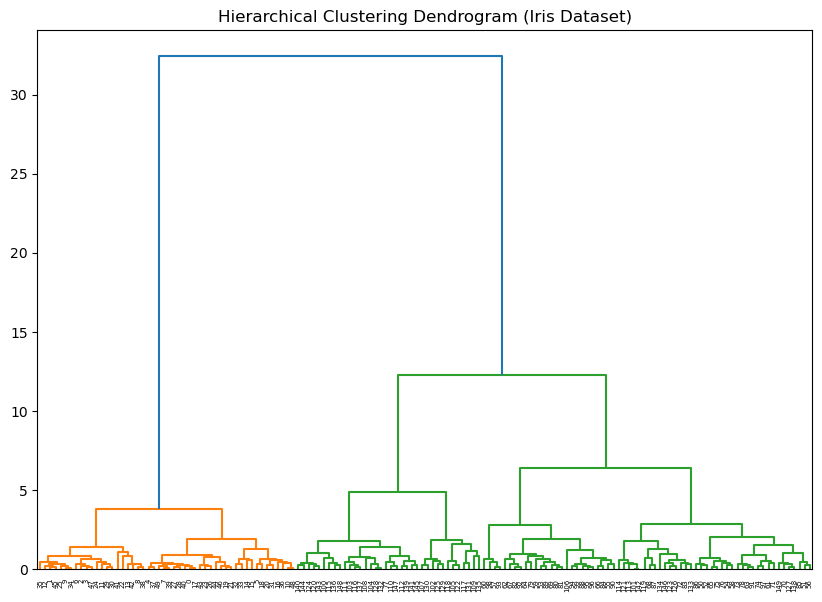

E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

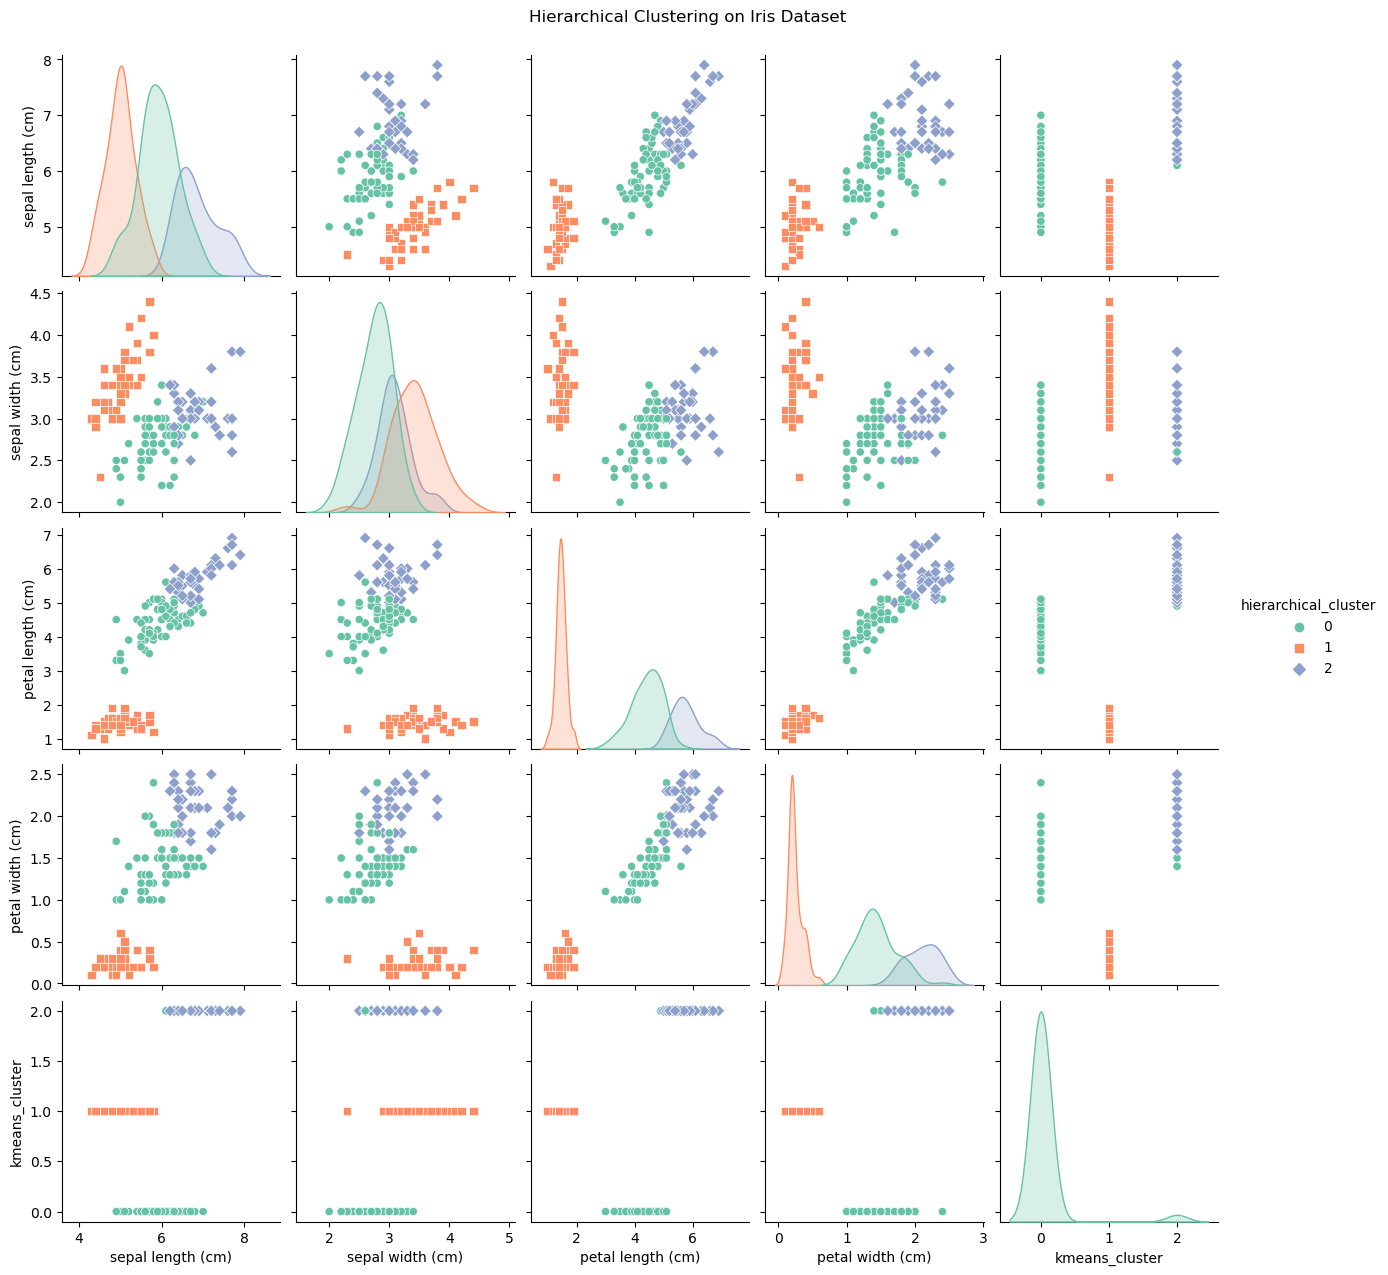

In [3]:
# Importing necessary libraries for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Performing hierarchical clustering
linked = linkage(iris_df.drop('kmeans_cluster', axis=1), method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram (Iris Dataset)")
plt.show()

# Applying Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
iris_df['hierarchical_cluster'] = hierarchical.fit_predict(iris_df.drop('kmeans_cluster', axis=1))

# Visualizing hierarchical clusters using a pair plot
sns.pairplot(iris_df, hue='hierarchical_cluster', palette='Set2', markers=["o", "s", "D"])
plt.suptitle("Hierarchical Clustering on Iris Dataset", y=1.02)
plt.show()